# Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("F:/Study/study/Intro to Data Science/project/bank-additional/bank-additional-full.csv", sep=';', header = 0, index_col = None)
# convert categratical data into dummy
## marriage
data["marr"] = ((data["marital"] == 'married')).astype(int)
data['sgl'] = ((data["marital"] == 'single')).astype(int)
data['m_unk'] = ((data["marital"] == 'unknown')).astype(int)
## occupation -- job
data['blue'] = ((data["job"] == 'blue-collar')).astype(int)
data['tech'] = ((data["job"] == 'technician')).astype(int)
data['j_unk'] = ((data["job"] == 'unknown')).astype(int)
data['svcs'] = ((data["job"] == 'services')).astype(int)
data['mgmt'] = ((data["job"] == 'management')).astype(int)
data['ret'] = ((data["job"] == 'retired')).astype(int)
data['entr'] = ((data["job"] == 'entrepreneur')).astype(int)
data['self'] = ((data["job"] == 'self-employed')).astype(int)
data['maid'] = ((data["job"] == 'housemaid')).astype(int)
data['unemp'] = ((data["job"] == 'unemployed')).astype(int)
data['stud'] = ((data["job"] == 'student')).astype(int)
## Previous outcome of marketing campaign was a success -- poutcome='success'
data['succ'] = ((data["poutcome"] == 'success')).astype(int)
data['nonxst'] = ((data["poutcome"] == 'nonexistent')).astype(int)
## Client has a personal loan -- loan
data['l_unk'] = ((data["loan"] == 'unknown')).astype(int)
data['loans'] = ((data["loan"] == 'yes')).astype(int)
## Client has credit in default -- default 
data['def'] = ((data["default"] == 'yes')).astype(int)
data['l_unk'] = ((data["default"] == 'unknown')).astype(int)
## Client has a housing loan
data['hsng'] = ((data["housing"] == 'yes')).astype(int)
data['h_unk'] = ((data["housing"] == 'unknown')).astype(int)
## Client subscribes for a term deposit -- y
data['yy'] = ((data["y"] == 'yes')).astype(int)
## contact method: if telephone--1, otherwise -- 0
data['contact'] = ((data["contact"] == 'telephone')).astype(int)
## education
data['edu_basic.4y'] = ((data["education"] == 'basic.4y')).astype(int)
data['edu_basic.6y'] = ((data["education"] == 'basic.6y')).astype(int)
data['edu_high.school'] = ((data["education"] == 'high.school')).astype(int)
data['edu_professional.course'] = ((data["education"] == 'professional.course')).astype(int)
data['edu_unknown'] = ((data["education"] == 'unknown')).astype(int)
data['edu_basic.9y'] = ((data["education"] == 'basic.9y')).astype(int)
data['edu_university.degree'] = ((data["education"] == 'university.degree')).astype(int)

# reomve the original categritcal variables in data
del data['marital']
del data['job']
del data['poutcome']
del data['loan']
del data['default']
del data['housing']
del data['y']
del data['education']

# Deal with aducation: concert to number: replace basic.4y w/ 4, etc.
# data.education.replace(['basic.4y', 'high.school', 'high.school', 'basic.9y','professional.course', 'unknown', 'university.degree', 'illiterate'], [4, 12, 6, 9, 14, 'Nan', 16, 0], inplace=True)
# Deal with Month:
data.month.replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], [5, 6, 7, 8, 10, 11, 12, 3, 4, 9], inplace=True)
# Deal with day_of_week:
data.day_of_week.replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace=True)


# missing values 
## pdays: create a new variable nanmed 'pdays_999', given '1' if 999 in 'pdays', otherwise, give value '0'; then replace the 999 in 'pdays' with average (when calculating ave, 999 were excluded)
data['pdays_999'] = ((data["pdays"] == 999)).astype(int)
data.replace(999, data['pdays'][data['pdays'] != 999].mean())
# data: 41188 rows × 43 columns

data

age  contact  month  day_of_week  duration  campaign  pdays  previous  \
0       56        1      5            1       261         1    999         0   
1       57        1      5            1       149         1    999         0   
2       37        1      5            1       226         1    999         0   
3       40        1      5            1       151         1    999         0   
4       56        1      5            1       307         1    999         0   
5       45        1      5            1       198         1    999         0   
6       59        1      5            1       139         1    999         0   
7       41        1      5            1       217         1    999         0   
8       24        1      5            1       380         1    999         0   
9       25        1      5            1        50         1    999         0   
10      41        1      5            1        55         1    999         0   
11      25        1      5            1       222         1    999         0   
12      29        1      5            1       137         1    999         0   
13      57        1      5            1       293         1    999         0   
14      35        1      5            1       146         1    999         0   
15      54        1      5            1       174         1    999         0   
16      35        1      5            1       312         1    999         0   
17      46        1      5            1       440         1    999         0   
18      50        1      5            1       353         1    999         0   
19      39        1      5            1       195         1    999         0   
20      30        1      5            1        38         1    999         0   
21      55        1      5            1       262         1    999         0   
22      55        1      5            1       342         1    999         0   
23      41        1      5            1       181         1    999         0   
24      37        1      5            1       172         1    999         0   
25      35        1      5            1        99         1    999         0   
26      59        1      5            1        93         1    999         0   
27      39        1      5            1       233         1    999         0   
28      54        1      5            1       255         2    999         0   
29      55        1      5            1       362         1    999         0   
...    ...      ...    ...          ...       ...       ...    ...       ...   
41158   35        0     11            2       363         1    999         0   
41159   35        0     11            2       514         1      9         4   
41160   33        0     11            2       843         1    999         0   
41161   33        0     11            2       510         1    999         1   
41162   60        0     11            2       347         2      4         1   
41163   35        0     11            2       385         3      4         2   
41164   54        0     11            2      1868         2     10         1   
41165   38        0     11            3       403         2    999         0   
41166   32        1     11            3       651         1    999         1   
41167   32        0     11            3       236         3    999         0   
41168   38        0     11            3       144         2    999         0   
41169   62        0     11            3       154         5    999         0   
41170   40        0     11            3       293         2    999         4   
41171   33        1     11            4       112         1    999         0   
41172   31        0     11            4       353         1    999         0   
41173   62        0     11            4       329         1    999         2   
41174   62        0     11            4       208         1      1         6   
41175   34        0     11            4       180         1    999         2   
41176  

In [2]:
def cleanData_pdays_original(infile_name):
    data = pd.read_csv(infile_name, sep=';', header = 0, index_col = None)
    # convert categratical data into dummy
    ## marriage
    data["marr"] = ((data["marital"] == 'married')).astype(int)
    data['sgl'] = ((data["marital"] == 'single')).astype(int)
    data['m_unk'] = ((data["marital"] == 'unknown')).astype(int)
    ## occupation -- job
    data['blue'] = ((data["job"] == 'blue-collar')).astype(int)
    data['tech'] = ((data["job"] == 'technician')).astype(int)
    data['j_unk'] = ((data["job"] == 'unknown')).astype(int)
    data['svcs'] = ((data["job"] == 'services')).astype(int)
    data['mgmt'] = ((data["job"] == 'management')).astype(int)
    data['ret'] = ((data["job"] == 'retired')).astype(int)
    data['entr'] = ((data["job"] == 'entrepreneur')).astype(int)
    data['self'] = ((data["job"] == 'self-employed')).astype(int)
    data['maid'] = ((data["job"] == 'housemaid')).astype(int)
    data['unemp'] = ((data["job"] == 'unemployed')).astype(int)
    data['stud'] = ((data["job"] == 'student')).astype(int)
    ## Previous outcome of marketing campaign was a success -- poutcome='success'
    data['succ'] = ((data["poutcome"] == 'success')).astype(int)
    data['nonxst'] = ((data["poutcome"] == 'nonexistent')).astype(int)
    ## Client has a personal loan -- loan
    data['l_unk'] = ((data["loan"] == 'unknown')).astype(int)
    data['loans'] = ((data["loan"] == 'yes')).astype(int)
    ## Client has credit in default -- default 
    data['def'] = ((data["default"] == 'yes')).astype(int)
    data['l_unk'] = ((data["default"] == 'unknown')).astype(int)
    ## Client has a housing loan
    data['hsng'] = ((data["housing"] == 'yes')).astype(int)
    data['h_unk'] = ((data["housing"] == 'unknown')).astype(int)
    ## Client subscribes for a term deposit -- y
    data['yy'] = ((data["y"] == 'yes')).astype(int)
    ## contact method: if telephone--1, otherwise -- 0
    data['contact'] = ((data["contact"] == 'telephone')).astype(int)
    ## education
    data['edu_basic.4y'] = ((data["education"] == 'basic.4y')).astype(int)
    data['edu_basic.6y'] = ((data["education"] == 'basic.6y')).astype(int)
    data['edu_high.school'] = ((data["education"] == 'high.school')).astype(int)
    data['edu_professional.course'] = ((data["education"] == 'professional.course')).astype(int)
    data['edu_unknown'] = ((data["education"] == 'unknown')).astype(int)
    data['edu_basic.9y'] = ((data["education"] == 'basic.9y')).astype(int)
    data['edu_university.degree'] = ((data["education"] == 'university.degree')).astype(int)

    # reomve the original categritcal variables in data
    del data['marital']
    del data['job']
    del data['poutcome']
    del data['loan']
    del data['default']
    del data['housing']
    del data['y']
    del data['education']
    
    # Deal with aducation: concert to number: replace basic.4y w/ 4, etc.
    # data.education.replace(['basic.4y', 'high.school', 'high.school', 'basic.9y','professional.course', 'unknown', 'university.degree', 'illiterate'], [4, 12, 6, 9, 14, 'Nan', 16, 0], inplace=True)
    # Deal with Month:
    data.month.replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], [5, 6, 7, 8, 10, 11, 12, 3, 4, 9], inplace=True)
    # Deal with day_of_week:
    data.day_of_week.replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace=True)
    
    return data   

In [3]:
cleanData_pdays_original("F:/Study/study/Intro to Data Science/project/bank-additional/bank-additional-full.csv")

age  contact  month  day_of_week  duration  campaign  pdays  previous  \
0       56        1      5            1       261         1    999         0   
1       57        1      5            1       149         1    999         0   
2       37        1      5            1       226         1    999         0   
3       40        1      5            1       151         1    999         0   
4       56        1      5            1       307         1    999         0   
5       45        1      5            1       198         1    999         0   
6       59        1      5            1       139         1    999         0   
7       41        1      5            1       217         1    999         0   
8       24        1      5            1       380         1    999         0   
9       25        1      5            1        50         1    999         0   
10      41        1      5            1        55         1    999         0   
11      25        1      5            1       222         1    999         0   
12      29        1      5            1       137         1    999         0   
13      57        1      5            1       293         1    999         0   
14      35        1      5            1       146         1    999         0   
15      54        1      5            1       174         1    999         0   
16      35        1      5            1       312         1    999         0   
17      46        1      5            1       440         1    999         0   
18      50        1      5            1       353         1    999         0   
19      39        1      5            1       195         1    999         0   
20      30        1      5            1        38         1    999         0   
21      55        1      5            1       262         1    999         0   
22      55        1      5            1       342         1    999         0   
23      41        1      5            1       181         1    999         0   
24      37        1      5            1       172         1    999         0   
25      35        1      5            1        99         1    999         0   
26      59        1      5            1        93         1    999         0   
27      39        1      5            1       233         1    999         0   
28      54        1      5            1       255         2    999         0   
29      55        1      5            1       362         1    999         0   
...    ...      ...    ...          ...       ...       ...    ...       ...   
41158   35        0     11            2       363         1    999         0   
41159   35        0     11            2       514         1      9         4   
41160   33        0     11            2       843         1    999         0   
41161   33        0     11            2       510         1    999         1   
41162   60        0     11            2       347         2      4         1   
41163   35        0     11            2       385         3      4         2   
41164   54        0     11            2      1868         2     10         1   
41165   38        0     11            3       403         2    999         0   
41166   32        1     11            3       651         1    999         1   
41167   32        0     11            3       236         3    999         0   
41168   38        0     11            3       144         2    999         0   
41169   62        0     11            3       154         5    999         0   
41170   40        0     11            3       293         2    999         4   
41171   33        1     11            4       112         1    999         0   
41172   31        0     11            4       353         1    999         0   
41173   62        0     11            4       329         1    999         2   
41174   62        0     11            4       208         1      1         6   
41175   34        0     11            4       180         1    999         2   
41176  

In [4]:
# data['month'].unique()
# # data['contact'].unique()
# # data['campaign'].unique()
# # data['pdays'].unique()
# # data['education'].unique()
# # plt.hist(data['age'])
# # plt.show()
# data['day_of_week'].unique()
# data.describe()
data = cleanData_pdays_original("F:/Study/study/Intro to Data Science/project/bank-additional/bank-additional-full.csv")

In [5]:
data.columns
droplist = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'duration']
data = data.drop(droplist, axis =1)

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV


# Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.


X = data.drop('yy',1)
y = data['yy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def testTrees(X_train, y_train, X_test, y_test, dep, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, max_depth = dep)
    df = clf.fit(X_train, y_train)
    return roc_auc_score(y_test, df.predict_proba(X_test)[:,1])

## Baseline decision tree

In [8]:
clf =DecisionTreeClassifier(criterion = 'entropy')
df = clf.fit(X_train, y_train)
roc_auc_score(y_test, df.predict_proba(X_test)[:,1])

0.60062973168304579

## Find the range of min_leaf_size and depth combination

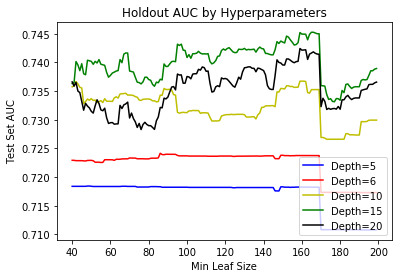

In [9]:
### use of five depths and stepwise increased number of leaves to see which combination of depths and leaves would result best AUC 
depths = [5,6,10, 15, 20]
leaves = np.arange(40, 200)

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in depths:
        res[d] = list()
    #Now train and get results for each option
        for l in leaves:
            res[d].append(testTrees(X_train, y_train, X_test, y_test, d, l, 1))

#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(leaves,res[depths[0]], 'b-', label = 'Depth={}'.format(depths[0]))
plt.plot(leaves,res[depths[1]], 'r-', label = 'Depth={}'.format(depths[1]))
plt.plot(leaves,res[depths[2]], 'y-', label = 'Depth={}'.format(depths[2]))
plt.plot(leaves,res[depths[3]], 'g-', label = 'Depth={}'.format(depths[3]))
plt.plot(leaves,res[depths[4]], 'k-', label = 'Depth={}'.format(depths[4]))

plt.legend(loc = 4)
ax.set_xlabel('Min Leaf Size')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')
plt.show()   

By checking the plot abover, we can clearly see AUC is higher when min leaf size is in (40,170) for all depths. This helps us to shrink our range of min leaf size in the next tuning step. 

In [10]:
#### The above plot shows the optimal AUC
best_depth = 15
best_min_leaf_size = res[best_depth].index(max(res[best_depth]))

max_AUC = max(res[best_depth])

print(best_depth, best_min_leaf_size, max_AUC)  


15 125 0.745271850042


## Find the range of min_sample_split and min_leaf_size

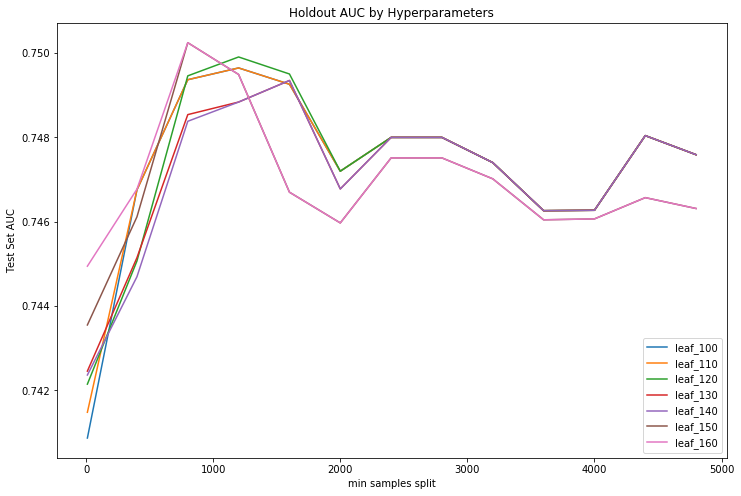

In [11]:
### First 
fig, ax =plt.subplots(figsize=(12, 8))
split = [10,400, 800, 1200, 1600, 2000,2400,2800,3200,3600,4000,4400,4800]
new_leaves = np.arange(100,170, step = 10)
for i in new_leaves:
    result = []
    for j in split:
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 15, min_samples_split = j, min_samples_leaf = i)
        dt.fit(X_train, y_train)
        auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
        result.append(auc)
#     print(result)
    ax.plot(split, result, label="leaf_{}".format(i))
    
plt.legend(loc = 4)
ax.set_xlabel('min samples split')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')
plt.show()   


## Tuning parameters to have optimal AUC

In [12]:
########################################## Cross validation and grid search 
from sklearn.cross_validation import KFold
X = data.drop('yy',1)
y = data['yy']
kfolds = KFold(data.shape[0], n_folds = 5, shuffle = True)

param_grid = {'max_depth': [10,15,20], 'min_samples_split': np.arange(800,1300,step = 100), 
              'min_samples_leaf': np.arange(100,160, step = 10)}
dt_grid_search= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search.fit(X, y)

dt_grid_search.best_score_, dt_grid_search.best_params_

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(0.76552047686199354,
 {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 1200})

In [13]:
dt_grid_search.cv_results_

{'mean_fit_time': array([ 0.1041636 ,  0.23125086,  0.27812786,  0.29148922,  0.30558915,
         0.29375305,  0.303128  ,  0.30312872,  0.33437872,  0.3000051 ,
         0.31875434,  0.33125415,  0.31875386,  0.32500463,  0.29687848,
         0.29375348,  0.34375443,  0.33125381,  0.34062915,  0.35625434,
         0.31562948,  0.32812858,  0.34687843,  0.32187958,  0.29687977,
         0.35000401,  0.33125391,  0.34062953,  0.33750501,  0.3406292 ,
         0.38750525,  0.37494135,  0.38077054,  0.37500477,  0.41562939,
         0.39062901,  0.42813082,  0.40000629,  0.35541348,  0.43115244,
         0.39375443,  0.36875477,  0.42188034,  0.39476609,  0.39942126,
         0.38265848,  0.37500491,  0.36250463,  0.37187915,  0.35000463,
         0.4000052 ,  0.34375443,  0.37187934,  0.36563001,  0.34687967,
         0.3843802 ,  0.37295995,  0.36562901,  0.35565276,  0.37936935,
         0.39448009,  0.38594632,  0.39062972,  0.3718811 ,  0.4031301 ,
         0.38750534,  0.39375401, 

## Choice 1: feature importance made by decision tree with its optimal parameters 

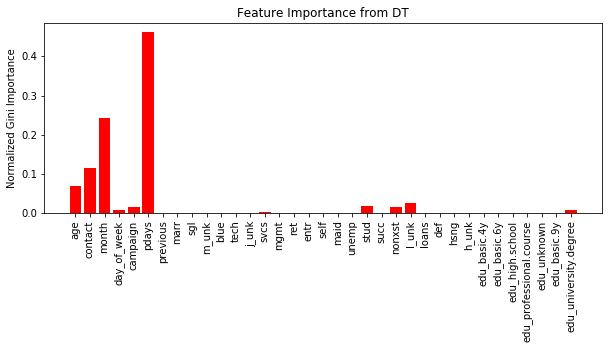

In [14]:
# Chosse minimum leaf size as 100, max depth = 15, and splits as 1200 where AUC is at its maximum
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split= 1200, min_samples_leaf= 100, max_depth =  15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = clf.fit(X_train, y_train)



fig, ax = plt.subplots(figsize=(10,3.5))
ax.bar(np.arange(35), df.feature_importances_, color = 'r')
ax.set_xticks(np.arange(len(df.feature_importances_)))
ax.set_xticklabels(X.columns.values, rotation = 90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')
plt.show()

In [15]:
#### The most important feature is duration which make sense because more contact duration would potential lead to higher return value, but the econd feature 
#### which is employed which is hard to get during that quarter

## Choice 2: feature importance with feature selection whose feature importance > 0 

In [16]:
# feature seletion for importance > 0

truncated_col = X.columns.values[list(df.feature_importances_ != 0)]
truncated_data= data.drop('yy',1)[truncated_col]

X_trun = truncated_data
y_trun = data['yy']



In [17]:
param_grid = {'max_depth': [10,15,20], 'min_samples_split': np.arange(800,1300,step = 100), 
              'min_samples_leaf': np.arange(100,170, step = 10)}

kfolds2 = KFold(truncated_data.shape[0], n_folds = 5, shuffle = True)

dt_grid_search2= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds2, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search2.fit(X_trun, y_trun)

dt_grid_search2.best_score_, dt_grid_search2.best_params_

(0.76584063326208818,
 {'max_depth': 15, 'min_samples_leaf': 160, 'min_samples_split': 800})

AUC Above increases a little bit

## Choice 3: Adding one feature at a time from 0 until 10 features added 

In [18]:
# Feature selection with top 10 features selected

a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:1]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.59690952690601218,
 {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 800})

In [19]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:2]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.70660147220777314,
 {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 800})

In [20]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:3]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.74706835414731421,
 {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 800})

In [21]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:4]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.75859094981582664,
 {'max_depth': 10, 'min_samples_leaf': 160, 'min_samples_split': 1000})

In [22]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:5]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.76413066415296704,
 {'max_depth': 10, 'min_samples_leaf': 160, 'min_samples_split': 900})

In [23]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:6]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.76219877725150165,
 {'max_depth': 20, 'min_samples_leaf': 160, 'min_samples_split': 1100})

### Below is the best AUC

In [24]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:7]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.76411919558244523,
 {'max_depth': 15, 'min_samples_leaf': 130, 'min_samples_split': 1100})

In [25]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:8]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.76356317017454711,
 {'max_depth': 20, 'min_samples_leaf': 160, 'min_samples_split': 800})

In [26]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:9]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

print(truncated_col3)
dt_grid_search3.best_score_, dt_grid_search3.best_params_


['pdays' 'month' 'contact' 'age' 'l_unk' 'stud' 'campaign' 'nonxst'
 'day_of_week']


(0.76263476671691088,
 {'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 1100})

In [27]:
a = df.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:10]

truncated_col3 = X.columns.values[b]
truncated_data3= data.drop('yy',1)[truncated_col3]

X_trun3 = truncated_data3
y_trun3 = data['yy']


kfolds3 = KFold(truncated_data3.shape[0], n_folds = 5, shuffle = True)

dt_grid_search3= GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid, cv = kfolds3, n_jobs = 8, scoring = 'roc_auc')
dt_grid_search3.fit(X_trun3, y_trun3)

dt_grid_search3.best_score_, dt_grid_search3.best_params_

(0.76340084310335354,
 {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 800})

# SPACE
# SPACE
# SPACE

## Export decision tree graph

In [38]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO

X_train, X_test, y_train, y_test = train_test_split(X_trun3, y_trun3, test_size=0.2, random_state=42)
clf_last = DecisionTreeClassifier(criterion='entropy', min_samples_split= 1100, min_samples_leaf= 130, max_depth =  15)
clf_last.fit(X_train, y_train)

dot_data = StringIO()
tree.export_graphviz(clf_last,out_file=dot_data,feature_names = X_trun3.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()).write_pdf("dtree5.pdf")

Tends to select the model with top 7 features since it is easy to explain. We will try Random Forest next

# Random Forest

## Base model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rclf = RandomForestClassifier(n_estimators=500,criterion='entropy') # default max_features is the square root of the number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rclf.fit(X_train, y_train)


probs_rclf = rclf.predict_proba(X_test)
preds_rclf = probs_rclf[:,1]
fpr_rclf, tpr_rclf, threshold_rclf = metrics.roc_curve(y_test, preds_rclf)
AUC_rclf = metrics.auc(fpr_rclf, tpr_rclf)
AUC_rclf

0.73387246176027576

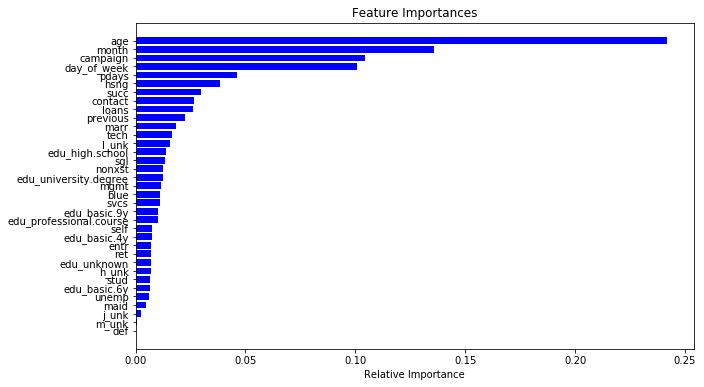

In [30]:
importances = rclf.feature_importances_
indices = np.argsort(importances)
cols = list(X.columns)
cols = [cols[x] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')
plt.show()

## Tuning parameters with 6 features selected

In [31]:
### First time to tune parameters with 6 features selected 

parameters = {
     'n_estimators':[500],
     'max_depth':(10, 15, 20,25,30),
     'min_samples_split':(500,1000,1500,2000),
     'min_samples_leaf':(60, 90,120,150,180)
}


k_folds = KFold(data.shape[0], n_folds = 5,shuffle = True)
clf = GridSearchCV(RandomForestClassifier(criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_

(0.76630024802138852,
 {'max_depth': 30,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 500})

## Tuning parameters with 9 features selected (Best AUC)

In [32]:
### Add max_feature = 9 
parameters = {
     'n_estimators':[500],
     'max_depth':(10, 15, 20,25,30),
     'min_samples_split':(500,1000,1500,2000),
     'min_samples_leaf':(60, 90,120,150,180)
}


k_folds = KFold(data.shape[0], n_folds = 5,shuffle = True)
clf = GridSearchCV(RandomForestClassifier(max_features=9,criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_

### Increase a lot!

(0.77397938566178393,
 {'max_depth': 25,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 500})

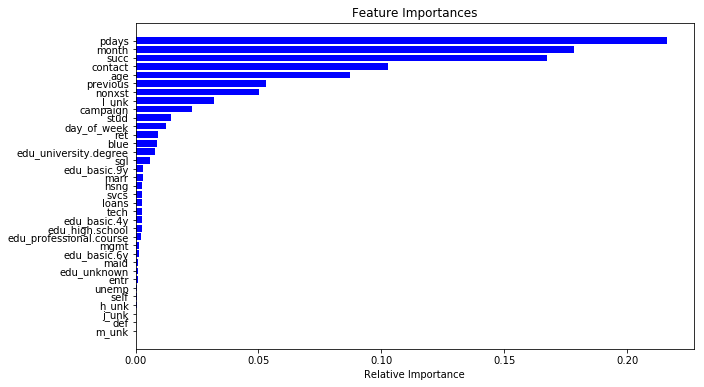

In [33]:
## fitting the optimal model and check the relative feature importance

rclf = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=15, min_samples_leaf= 60, min_samples_split= 500, max_features=9) 
# default max_features is the square root of the number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rclf.fit(X_train, y_train)


probs_rclf = rclf.predict_proba(X_test)
preds_rclf = probs_rclf[:,1]
fpr_rclf, tpr_rclf, threshold_rclf = metrics.roc_curve(y_test, preds_rclf)
AUC_rclf = metrics.auc(fpr_rclf, tpr_rclf)
AUC_rclf

importances = rclf.feature_importances_
indices = np.argsort(importances)
cols = list(X.columns)
cols = [cols[x] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')
plt.show()

### Top 9 important features

In [34]:
a = rclf.feature_importances_
b = sorted(range(len(a)), key=lambda i:a[i], reverse=True)[0:9]

truncated_col3 = X.columns.values[b]
truncated_col3

array(['pdays', 'month', 'succ', 'contact', 'age', 'previous', 'nonxst',
       'l_unk', 'campaign'], dtype=object)

In [36]:
### Add max_feature = 5 to match the decison tree result to see if the AUC can be improved
parameters = {
     'n_estimators':[500],
     'max_depth':(10, 15, 20,25,30),
     'min_samples_split':(500,1000,1500,2000),
     'min_samples_leaf':(60, 90,120,150,180)
}


k_folds = KFold(data.shape[0], n_folds = 5,shuffle = True)
clf = GridSearchCV(RandomForestClassifier(max_features=5,criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_


(0.76621735064861229,
 {'max_depth': 30,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 500})

In [39]:
### Add max_feature = 7 to match the decison tree result to see if the AUC can be improved
parameters = {
     'n_estimators':[500],
     'max_depth':(10, 15, 20,25,30),
     'min_samples_split':(500,1000,1500,2000),
     'min_samples_leaf':(60, 90,120,150,180)
}


k_folds = KFold(data.shape[0], n_folds = 5,shuffle = True)
clf = GridSearchCV(RandomForestClassifier(max_features=7,criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_


(0.77149400653388356,
 {'max_depth': 20,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 500})

In [40]:
### Add max_feature = 8 to match the decison tree result to see if the AUC can be improved
parameters = {
     'n_estimators':[500],
     'max_depth':(10, 15, 20,25,30),
     'min_samples_split':(500,1000,1500,2000),
     'min_samples_leaf':(60, 90,120,150,180)
}


k_folds = KFold(data.shape[0], n_folds = 5,shuffle = True)
clf = GridSearchCV(RandomForestClassifier(max_features=8,criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_


(0.77285243996886976,
 {'max_depth': 20,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 500})

## Use the same parameters from decision tree (meanless)

In [35]:
### use of optimal parameters from decision tree 
parameters = {
     'n_estimators':(500,1000),
     'max_depth':(10,10),
     'min_samples_split':(800,800),
     'min_samples_leaf':(120,120)
}


k_folds = KFold(data.shape[0], n_folds = 5, shuffle = True)
clf = GridSearchCV(RandomForestClassifier(criterion='entropy'), parameters, cv=kfolds, n_jobs=8, scoring = 'roc_auc')
clf.fit(X, y)
clf.best_score_, clf.best_params_


#### No imrovements compared to 

(0.75998075060582315,
 {'max_depth': 10,
  'min_samples_leaf': 120,
  'min_samples_split': 800,
  'n_estimators': 1000})